In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Load datasets
train_stemmed = pd.read_csv('../data/processed/ag_news_p/train_stemmed.csv')
test_stemmed = pd.read_csv('../data/processed/ag_news_p/test_stemmed.csv')
train_lemmatized_wordnet = pd.read_csv('../data/processed/ag_news_p/train_lemmatized_wordnet.csv')
test_lemmatized_wordnet = pd.read_csv('../data/processed/ag_news_p/test_lemmatized_wordnet.csv')
train_lemmatized_spacy = pd.read_csv('../data/processed/ag_news_p/train_lemmatized_spacy.csv')
test_lemmatized_spacy = pd.read_csv('../data/processed/ag_news_p/test_lemmatized_spacy.csv')

In [6]:
# Vectorize and train models
def train_and_evaluate(train_data, test_data, text_column):
    vectorizer = TfidfVectorizer(max_features=1000)
    X_train = vectorizer.fit_transform(train_data[text_column])
    X_test = vectorizer.transform(test_data[text_column])
    y_train = train_data['label']
    y_test = test_data['label']

    model = LogisticRegression(max_iter=200)  # Increase max_iter
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall

In [7]:
# Evaluate models
metrics = {}
metrics['stemmed'] = train_and_evaluate(train_stemmed, test_stemmed, 'text_stemmed')
metrics['lemmatized_wordnet'] = train_and_evaluate(train_lemmatized_wordnet, test_lemmatized_wordnet, 'text_lemmatized_wordnet')
metrics['lemmatized_spacy'] = train_and_evaluate(train_lemmatized_spacy, test_lemmatized_spacy, 'text_lemmatized_spacy')

# Compare results
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall'])
print(metrics_df)

            stemmed  lemmatized_wordnet  lemmatized_spacy
Accuracy   0.867895            0.867632          0.868158
Precision  0.867385            0.867011          0.867534
Recall     0.867895            0.867632          0.868158


/tmp/ipykernel_441298/2348058053.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


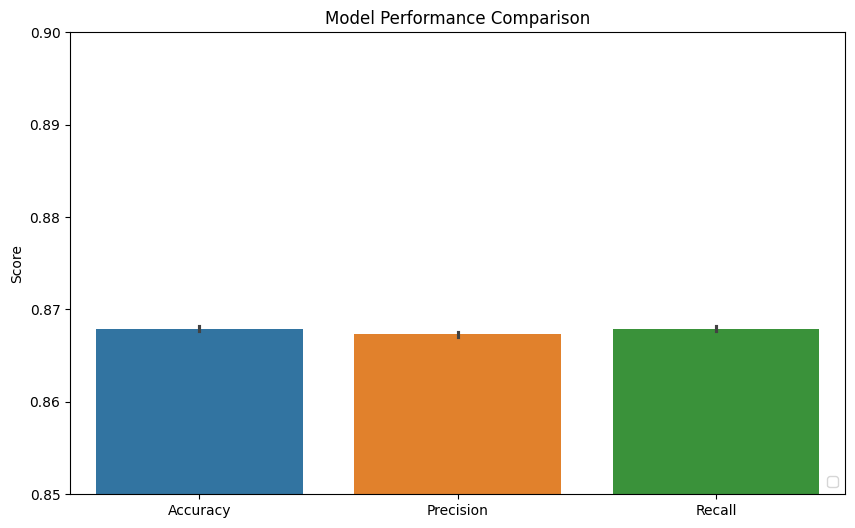

In [8]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall'])

# Bar Plot with Annotations
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=metrics_df.T)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.85, 0.9)  # Adjust the y-axis for better visualization

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', vmin=0.85, vmax=0.9)
plt.title('Performance Metrics Heatmap')
plt.show()

In [5]:
# Discuss results
print("Stemmed vs Lemmatized:")
print("Advantages and Disadvantages of Stemming:")
print("- Advantages: Simplicity, speed, less resource-intensive.")
print("- Disadvantages: Can over-stem, resulting in non-real words, less accurate in understanding context.")

print("Advantages and Disadvantages of Lemmatization:")
print("- Advantages: More accurate, considers context, results in real words.")
print("- Disadvantages: More computationally expensive, slower.")

Stemmed vs Lemmatized:
Advantages and Disadvantages of Stemming:
- Advantages: Simplicity, speed, less resource-intensive.
- Disadvantages: Can over-stem, resulting in non-real words, less accurate in understanding context.
Advantages and Disadvantages of Lemmatization:
- Advantages: More accurate, considers context, results in real words.
- Disadvantages: More computationally expensive, slower.
